# Trying out `object_graph.py` visualizers

SPDX-License-Identifier: 0BSD

In [1]:
import itertools
import sys

from palgoviz.fibonacci import fib_nest
from palgoviz.object_graph import draw_one_tuple, draw_tuples, draw_tuples_alt
from palgoviz.recursion import nest

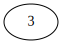

In [2]:
draw_one_tuple(3)

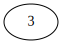

In [3]:
draw_tuples_alt(3)

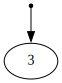

In [4]:
draw_one_tuple((3,))

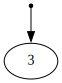

In [5]:
draw_tuples_alt((3,))

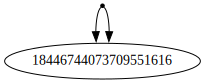

In [6]:
draw_one_tuple((2**64, 2**64))

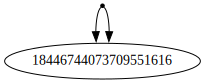

In [7]:
draw_tuples_alt((2**64, 2**64))

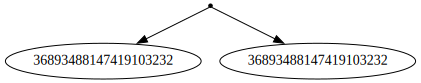

In [8]:
draw_one_tuple((2**65, 2**65))

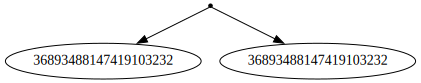

In [9]:
draw_tuples_alt((2**65, 2**65))

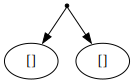

In [10]:
draw_one_tuple(([], []))

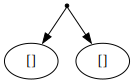

In [11]:
draw_tuples_alt(([], []))

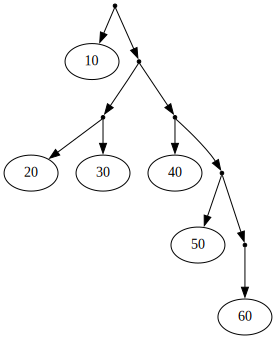

In [12]:
t = (10, ((20, 30), (40, (50, (60,)))))
draw_one_tuple(t)

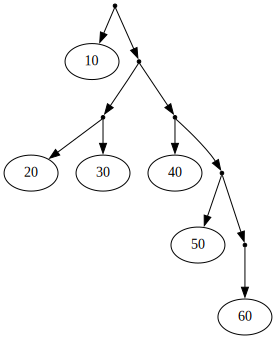

In [13]:
draw_tuples_alt(t)

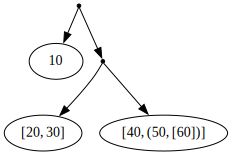

In [14]:
t = (10, ([20, 30], [40, (50, [60])]))
draw_one_tuple(t)

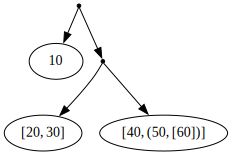

In [15]:
draw_tuples_alt(t)

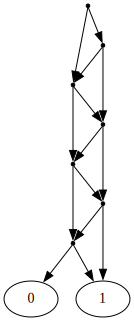

In [16]:
# t = ((((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1))))),
#      (((1, (0, 1)), ((0, 1), (1, (0, 1)))),
#       (((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1)))))))
# draw_one_tuple(t)
draw_one_tuple(fib_nest(8))  # De-duplication guaranteed.

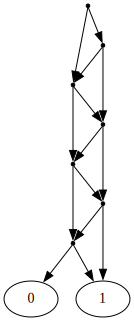

In [17]:
draw_tuples_alt(fib_nest(8))  # De-duplication guaranteed.

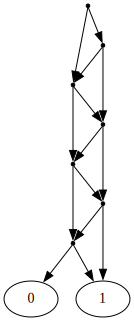

In [18]:
t = ((((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1))))),
     (((1, (0, 1)), ((0, 1), (1, (0, 1)))),
      (((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1)))))))
draw_one_tuple(t)  # De-duplication not guaranteed.

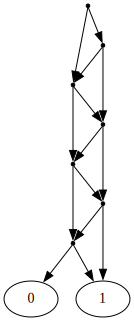

In [19]:
draw_tuples_alt(t)  # De-duplication not guaranteed.

In [20]:
draw_tuples()  # Produces an empty graph.

In [21]:
draw_tuples_alt()  # Produces an empty graph.

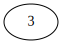

In [22]:
t = 3
draw_tuples(t, t, t, t, t, t, t, t)  # Guaranteed to have only 1 node.

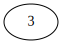

In [23]:
draw_tuples_alt(t, t, t, t, t, t, t, t)  # Guaranteed to have only 1 node.

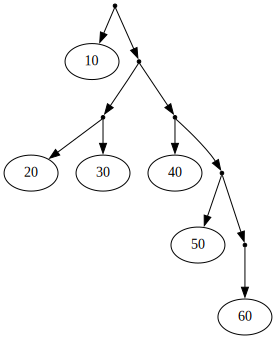

In [24]:
t = (10, ((20, 30), (40, (50, (60,)))))
draw_tuples(t)  # Same as draw_one_tuple.

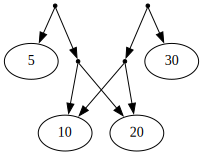

In [25]:
t = (5, (10, 20))
u = ((10, 20), 30)
draw_tuples(t, u)

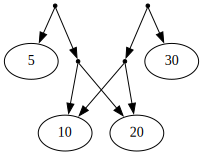

In [26]:
draw_tuples_alt(t, u)

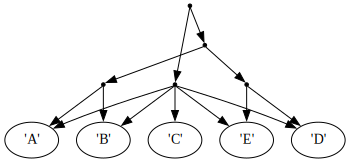

In [27]:
t = ('A', 'B', 'C', 'D', 'E')
u = ('A', 'B')
v = ('D', 'E')
w = (u, v)
x = (t, w)
draw_tuples(w, x)

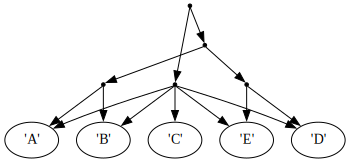

In [28]:
draw_tuples_alt(w, x)

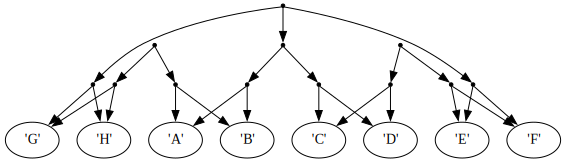

In [29]:
t = ((('A', 'B'), ('C', 'D')), ('E', 'F'), ('G', 'H'))
u = (('C', 'D'), ('E', 'F'))
v = (('A', 'B'), ('G', 'H'))
draw_tuples(t, u, v)

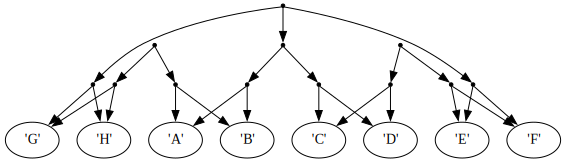

In [30]:
draw_tuples_alt(t, u, v)

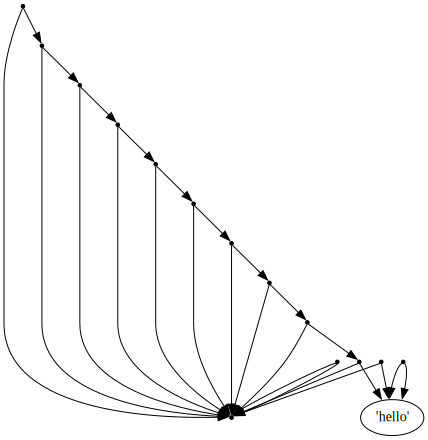

In [31]:
t = ((), ((), ((), ((), ((), ((), ((), ((), ((), ((), 'hello'))))))))))
u = ('hello', ())
v = ((), ())
w = ('hello', 'hello')
draw_tuples(t, u, v, w)

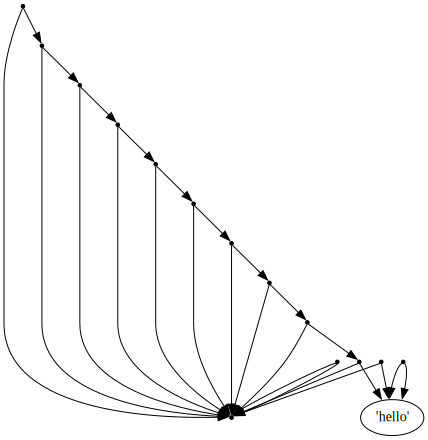

In [32]:
draw_tuples_alt(t, u, v, w)

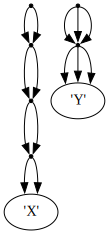

In [33]:
draw_tuples(nest(seed='X', degree=2, height=4), nest(seed='Y', degree=3, height=2))

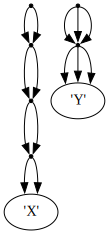

In [34]:
draw_tuples_alt(nest(seed='X', degree=2, height=4), nest(seed='Y', degree=3, height=2))

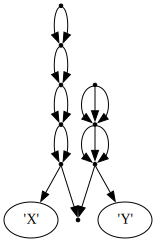

In [35]:
draw_tuples(nest(seed=('X', ()), degree=2, height=4), nest(seed=((), 'Y'), degree=3, height=2))

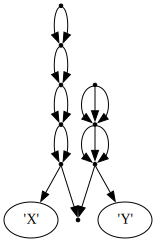

In [36]:
draw_tuples_alt(nest(seed=('X', ()), degree=2, height=4), nest(seed=((), 'Y'), degree=3, height=2))

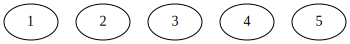

In [37]:
draw_tuples(*range(1, 6))  # All isolated vertices (the graph has no edges).

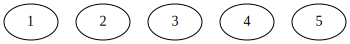

In [38]:
draw_tuples_alt(*range(1, 6))  # All isolated vertices (the graph has no edges).

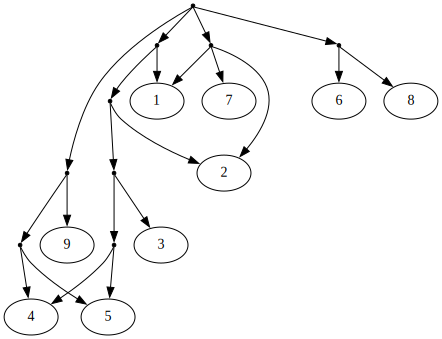

In [39]:
t = ((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1))
draw_tuples(t)

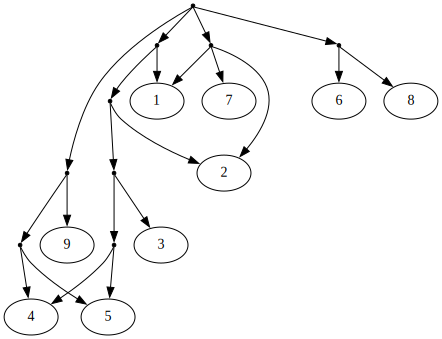

In [40]:
draw_tuples_alt(t)

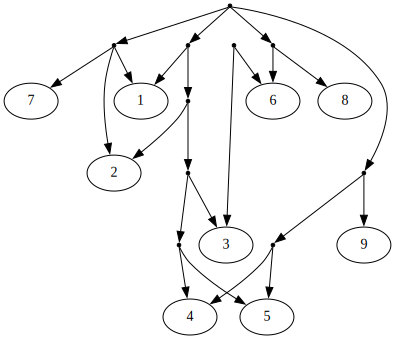

In [41]:
draw_tuples(t, (3, 6))

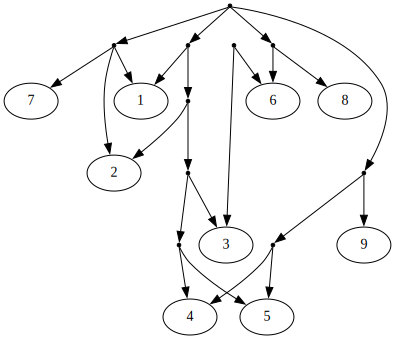

In [42]:
draw_tuples_alt(t, (3, 6))

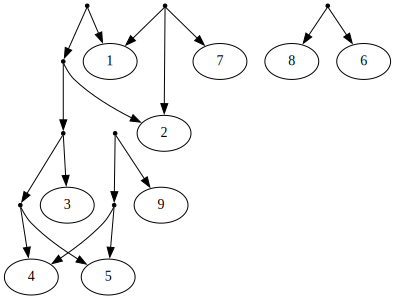

In [43]:
draw_tuples((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1))

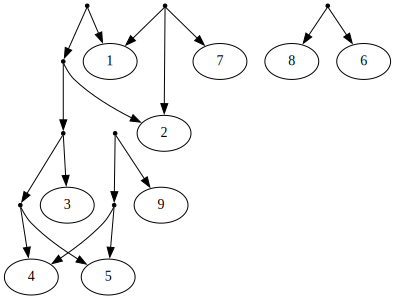

In [44]:
draw_tuples_alt((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1))

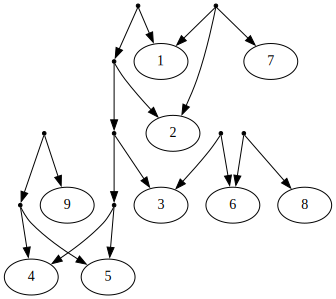

In [45]:
draw_tuples((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1), (3, 6))

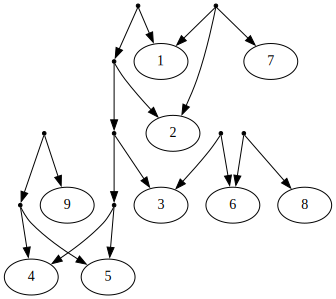

In [46]:
draw_tuples_alt((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1), (3, 6))

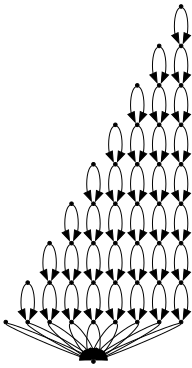

In [47]:
# De-duplication across nest() calls is not guaranteed and will usually be incomplete.
draw_tuples(*(nest(seed=(), degree=2, height=h) for h in range(10)))

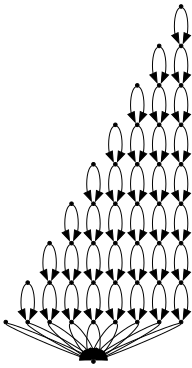

In [48]:
draw_tuples_alt(*(nest(seed=(), degree=2, height=h) for h in range(10)))

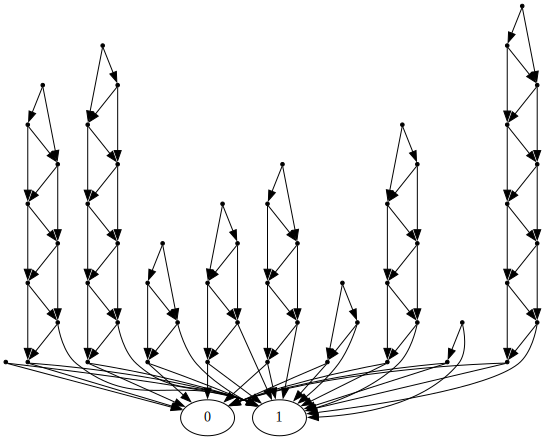

In [49]:
# Same deal with fib_nest() calls.
draw_tuples(*(fib_nest(i) for i in range(12)))

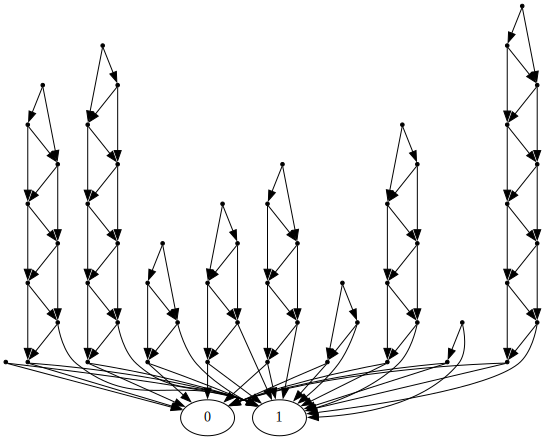

In [50]:
draw_tuples_alt(*(fib_nest(i) for i in range(12)))

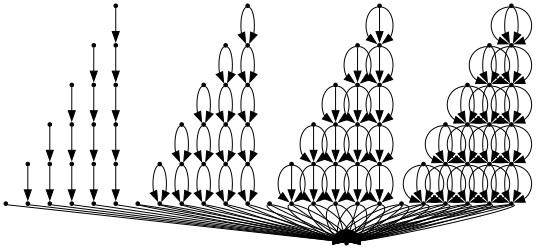

In [51]:
# Just for fun.
draw_tuples(*(nest(seed=(), degree=d, height=h) for d in range(5) for h in range(7)))

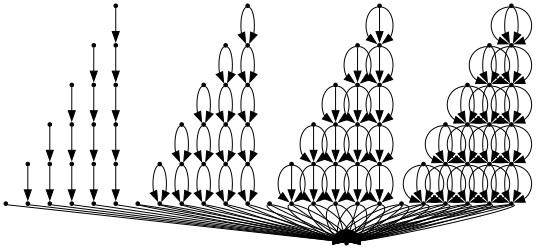

In [52]:
draw_tuples_alt(*(nest(seed=(), degree=d, height=h) for d in range(5) for h in range(7)))

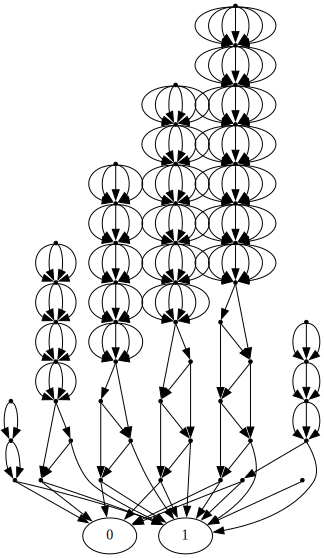

In [53]:
draw_tuples(*(nest(seed=fib_nest(n), degree=n, height=n) for n in range(8)))

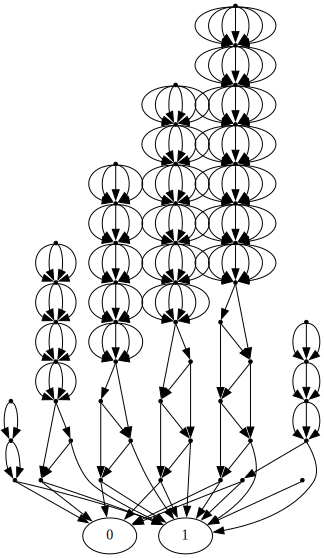

In [54]:
draw_tuples_alt(*(nest(seed=fib_nest(n), degree=n, height=n) for n in range(8)))

In [55]:
def make_binary_tree(height, start=0):
    leaves = itertools.count(start)
    
    def make_subtree(h):
        if h == 0:
            return next(leaves)
        return (make_subtree(h - 1), make_subtree(h - 1))
    
    return make_subtree(height)

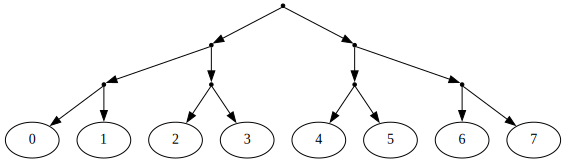

In [56]:
draw_tuples(make_binary_tree(3))

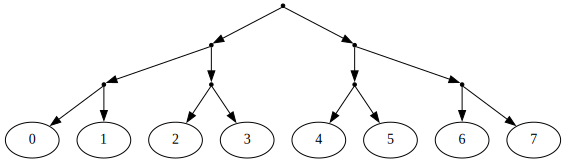

In [57]:
draw_tuples_alt(make_binary_tree(3))

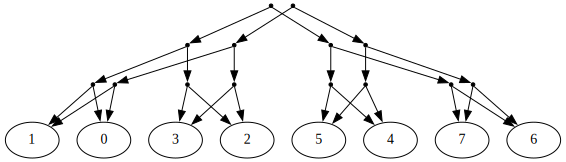

In [58]:
draw_tuples(make_binary_tree(3), make_binary_tree(3))

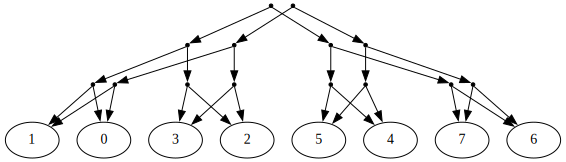

In [59]:
draw_tuples_alt(make_binary_tree(3), make_binary_tree(3))

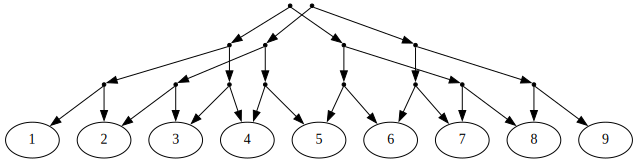

In [60]:
draw_tuples(make_binary_tree(3, 1), make_binary_tree(3, 2))

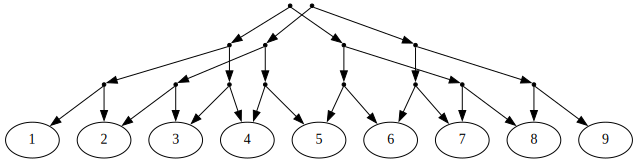

In [61]:
draw_tuples_alt(make_binary_tree(3, 1), make_binary_tree(3, 2))

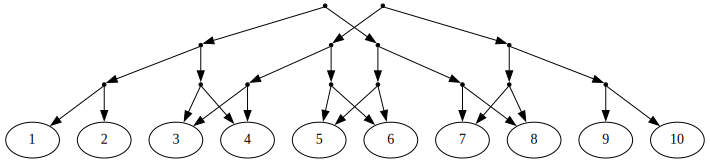

In [62]:
draw_tuples(make_binary_tree(3, 1), make_binary_tree(3, 3))

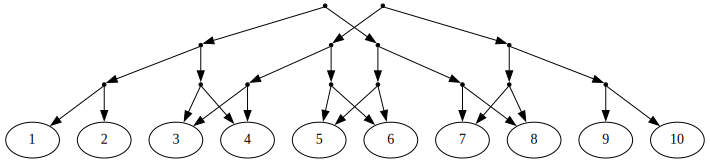

In [63]:
draw_tuples_alt(make_binary_tree(3, 1), make_binary_tree(3, 3))

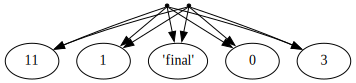

In [64]:
draw_tuples(sys.version_info, tuple(sys.version_info))

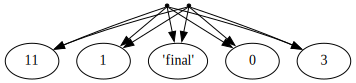

In [65]:
draw_tuples_alt(sys.version_info, tuple(sys.version_info))

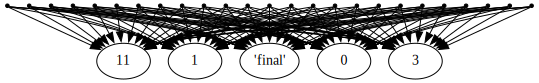

In [66]:
draw_tuples(*(tuple(sys.version_info) for _ in range(25)))

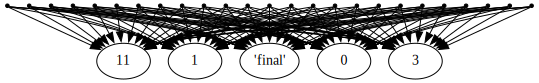

In [67]:
draw_tuples_alt(*(tuple(sys.version_info) for _ in range(25)))

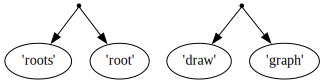

In [68]:
draw_tuples(draw_tuples.__code__.co_varnames,  # Variables no enclosed scope captures.
            draw_tuples.__code__.co_cellvars)  # Variables some enclosed scope captures.

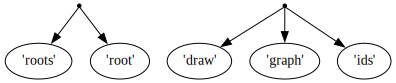

In [69]:
draw_tuples_alt(draw_tuples_alt.__code__.co_varnames,  # Variables no enclosed scope captures.
                draw_tuples_alt.__code__.co_cellvars)  # Variables some enclosed scope captures.

In [70]:
def identity_function(x):
    return x

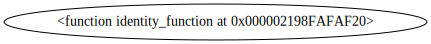

In [71]:
draw_tuples(identity_function)

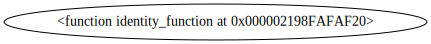

In [72]:
draw_tuples_alt(identity_function)

In [73]:
lambda x: x

<function __main__.<lambda>(x)>

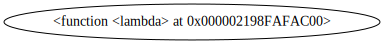

In [74]:
draw_tuples(lambda x: x)  # The semipredicate problem.

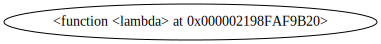

In [75]:
draw_tuples_alt(lambda x: x)  # The semipredicate problem.

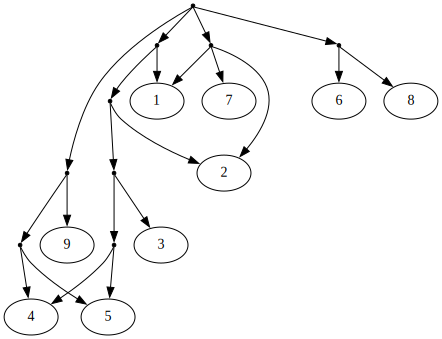

In [76]:
a = ((2, 7, 1), (8, 6), (9, (4, 5)), ((((5, 4), 3), 2), 1))
draw_tuples(a)

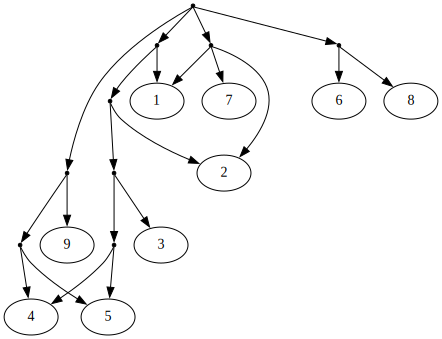

In [77]:
draw_tuples_alt(a)

In [78]:
class I(int): 
    pass

In [79]:
I(1)

1

In [80]:
I(1) is I(1)

False

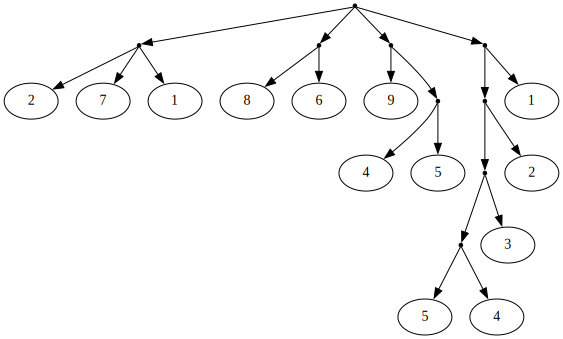

In [81]:
a =((I(2), I(7), I(1)), (I(8), I(6)), (I(9), (I(4), I(5))), ((((I(5), I(4)), I(3)), I(2)), I(1)))
draw_tuples(a)

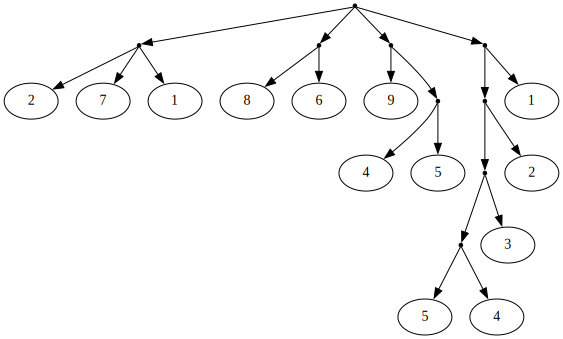

In [82]:
draw_tuples_alt(a)